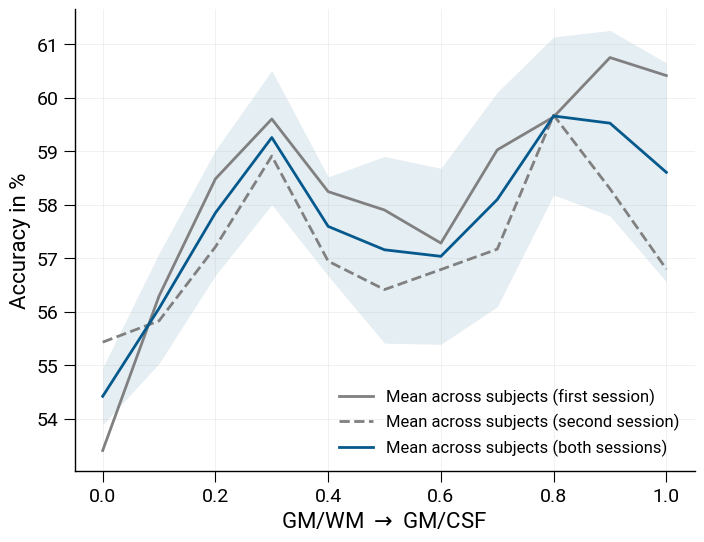

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import sem
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
plt.style.use(os.path.join(module_path, "src", "default.mplstyle"))
from src.config import SESSION, N_LAYER
from palettable.scientific.sequential import Nuuk_3 as ColMap

SUBJECTS = ["p1", "p2", "p3", "p4", "p5"]
DIR_DATA = "/data/pt_01880/Experiment1_ODC/paper/decoding"
SESS = "VASO"
PART = "both"  # first | second | both
FILTER_SIZE = "none"

def get_profile(day):
    y = np.zeros((N_LAYER, len(SUBJECTS)))
    for i, subj in enumerate(SUBJECTS):
        path = Path(DIR_DATA) / subj / f"{SESS}{SESSION[subj][SESS][day]}"
        file = path / f"bandpass_{FILTER_SIZE}" / "accuracy.csv"
        data = np.genfromtxt(file, delimiter=',')
        for j in range(N_LAYER):
            y[j, i] = np.mean(data[j, :] * 100)
    return y

x = np.linspace(0, 1, N_LAYER)
y1 = get_profile(0)
y2 = get_profile(1)
y3 = np.append(y1, y2, axis=1)

fig, ax = plt.subplots()
color = ColMap.hex_colors
if PART == "first":
    ax.plot(x, np.mean(y1, axis=1), color="gray", linestyle="-", label="Mean across subjects (first session)")
    ax.fill_between(x, np.mean(y1, axis=1)-sem(y1, axis=1), np.mean(y1, axis=1)+sem(y1, axis=1), color="gray", alpha=0.1, lw=0)
elif PART == "second":
    ax.plot(x, np.mean(y2, axis=1), color="gray", linestyle="--", label="Mean across subjects (second session)")
    ax.fill_between(x, np.mean(y2, axis=1)-sem(y2, axis=1), np.mean(y2, axis=1)+sem(y2, axis=1), color="gray", alpha=0.1, lw=0)
elif PART == "both":
    ax.plot(x, np.mean(y1, axis=1), color="gray", linestyle="-", label="Mean across subjects (first session)")
    ax.plot(x, np.mean(y2, axis=1), color="gray", linestyle="--", label="Mean across subjects (second session)")
    ax.plot(x, np.mean(y3, axis=1), color=color[0], linestyle="-", label="Mean across subjects (both sessions)")
    ax.fill_between(x, np.mean(y3, axis=1)-sem(y3, axis=1), np.mean(y3, axis=1)+sem(y3, axis=1), color=color[0], alpha=0.1, lw=0)
ax.set_xlabel(r"GM/WM $\rightarrow$ GM/CSF")
ax.set_ylabel("Accuracy in %")
ax.legend(loc="lower right")
file_out = f"/data/pt_01880/decoding_{SESS}_{PART}.svg"
fig.savefig(file_out, dpi=300, bbox_inches="tight", transparent=True, format="svg")

### Number of features

/tmp/ipykernel_728924/1731296849.py:6: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


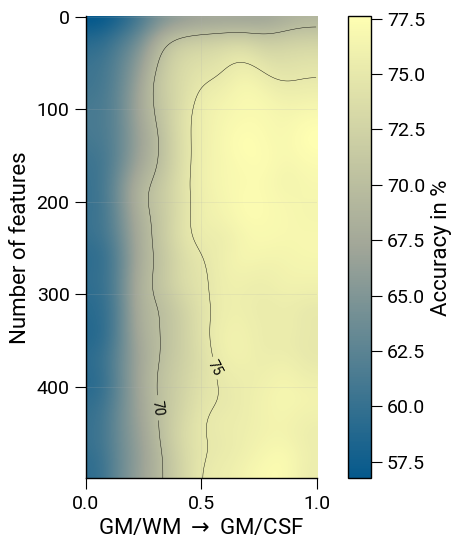

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import sem
from skimage.transform import resize
from scipy.ndimage.filters import gaussian_filter
from palettable.scientific.sequential import Nuuk_3 as ColMap
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
plt.style.use(os.path.join(module_path, "src", "default.mplstyle"))
from src.config import SESSION, N_LAYER


SUBJECTS = ["p1", "p2", "p3", "p4", "p5"]
DIR_DATA = "/data/pt_01880/Experiment1_ODC/paper/n_features"
SESS = "SE_EPI"
FILTER_SIZE = "none"

def get_profile(day):
    y = np.zeros((N_LAYER, len(SUBJECTS)))
    for i, subj in enumerate(SUBJECTS):
        path = Path(DIR_DATA) / subj / f"{SESS}{SESSION[subj][SESS][day]}"
        file = path / "accuracy.csv"
        data = np.genfromtxt(file, delimiter=',')
    return data

z1 = get_profile(0)
z2 = get_profile(1)
z3 = (z1+z2)/2
dim1, dim2 = 500, 250
x, y = np.meshgrid(np.arange(dim2), np.arange(dim1))
z3_resized = resize(z3,(dim1,dim2))
z3_filtered = gaussian_filter(z3_resized, 14.0)
z3_filtered *= 100

fig, ax = plt.subplots()
im = ax.imshow(z3_filtered, cmap=ColMap.mpl_colormap)
#cs = ax.contour(x, y, z3_filtered, [55.0, 57.0], colors="black", linewidths=0.3)  # vaso
#cs = ax.contour(x, y, z3_filtered, [80.0, 85.0], colors="black", linewidths=0.3)  # ge_epi
cs = ax.contour(x, y, z3_filtered, [70.0, 75.0], colors="black", linewidths=0.3)  # se_epi
ax.clabel(cs, inline=True, fontsize=10)
ax.set_xticks([0, 125, 250], [0.0, 0.5, 1.0])
ax.set_xlabel(r"GM/WM $\rightarrow$ GM/CSF")
ax.set_ylabel("Number of features")
cbar = plt.colorbar(im)
cbar.set_label("Accuracy in %")
file_out = f"/data/pt_01880/n_features_{SESS}.svg"
fig.savefig(file_out, dpi=300, bbox_inches="tight", transparent=True, format="svg")